In [543]:
import spectral_processes as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [544]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [545]:
peak6_datasets = sp.load(6)

1 Loaded spectroscopy_data/peaks_6\6_ (1).CSV:
2 Loaded spectroscopy_data/peaks_6\6_ (10).CSV:
3 Loaded spectroscopy_data/peaks_6\6_ (2).CSV:
4 Loaded spectroscopy_data/peaks_6\6_ (3).CSV:
5 Loaded spectroscopy_data/peaks_6\6_ (4).CSV:
6 Loaded spectroscopy_data/peaks_6\6_ (5).CSV:
7 Loaded spectroscopy_data/peaks_6\6_ (6).CSV:
8 Loaded spectroscopy_data/peaks_6\6_ (7).CSV:
9 Loaded spectroscopy_data/peaks_6\6_ (8).CSV:
10 Loaded spectroscopy_data/peaks_6\6_ (9).CSV:
11 Loaded spectroscopy_data/peaks_6\CS-BB-22.CSV:
12 Loaded spectroscopy_data/peaks_6\CS-BB-23.CSV:


In [546]:
x,y = sp.get_dataset(0, peak6_datasets)

In [547]:
#moving average
x,y = sp.move_ave(x=x, y=y, window_size=10)

In [548]:
xknots_indices, yknots = sp.get_knots(x=x, y=y,  npoints = 15, plotting=True)

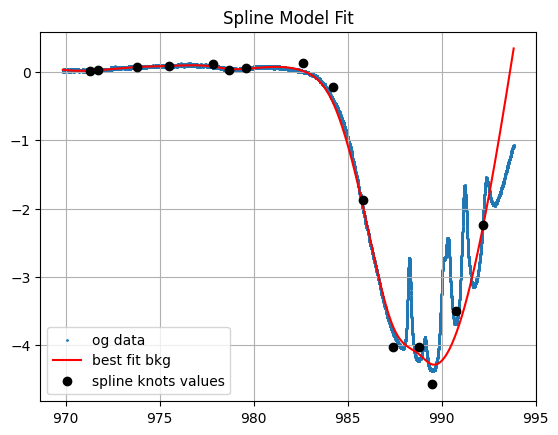

In [549]:
bkg = sp.spline_model(xknots_indices, x,y, plot=True)

In [550]:
left=987
right=993

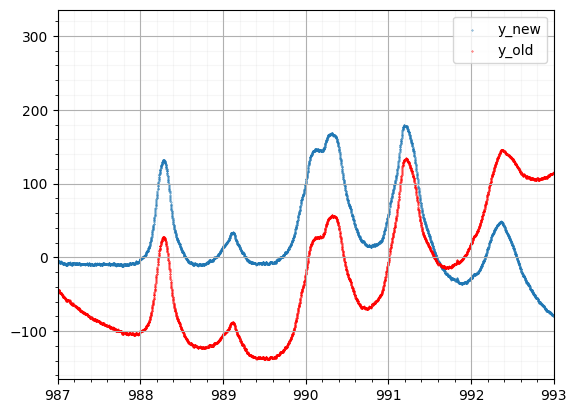

In [551]:
y = sp.subtract_bkg(bkg, y, x, plot_orientacne=True, left = left, right = right)

In [552]:
x,y = sp.cut_data(x=x,y=y,left=987, right=993)
y += abs(min(y))

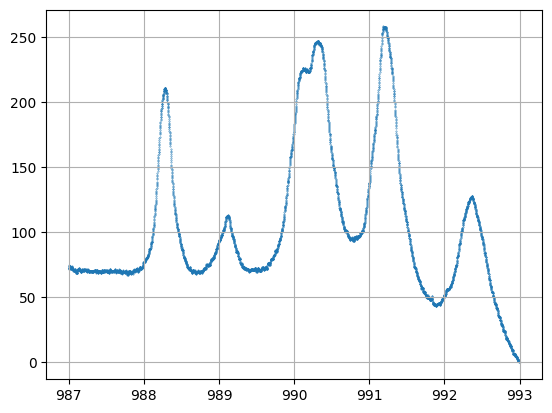

In [553]:
plt.scatter(x,y,s=0.1)
plt.grid(which='both')

In [554]:
centers = [
    988.4,
    989,
    990.2,
    990.4,
    991.2,
    992.4
]
amplitudes = [
    80,
    20,80,80,80,80
]

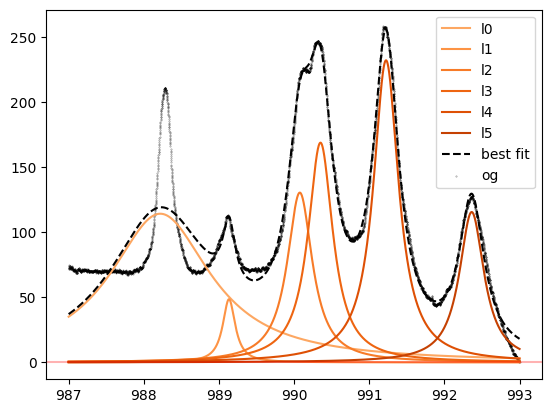

In [555]:
out = sp.model_peaks(peak_num = 6, centers=centers, x= x,y=y,plot=True, amplitudes = amplitudes)


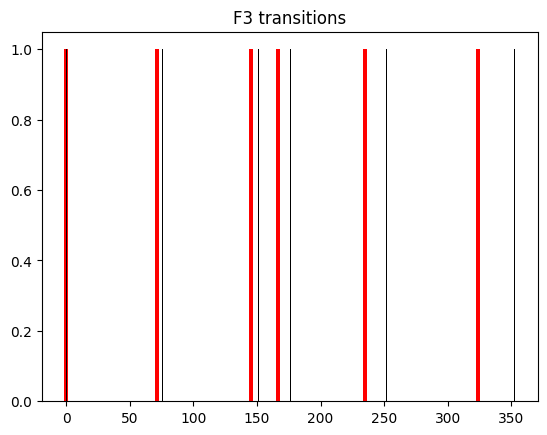

In [556]:
peaks, fwhm = sp.eval_peaks(out)

# GLOBAL

In [557]:
# global guessing variables
cuts = np.zeros((12,2))
centers = np.zeros((12,6))
amplitudes = np.zeros((12,6))

In [559]:
#load in already guessed cuts for evaluation range where the peaks are
cuts = pd.read_csv('cuts.csv')
cuts = cuts.drop(columns='Unnamed: 0')
cuts = np.array(cuts)

#load in already guessed center positions
centers = pd.read_csv('centers.csv')
centers = centers.drop(columns='Unnamed: 0')
centers = np.array(centers)

In [560]:
peaks  = np.zeros(12, dtype=object ) #saves here - fitted peaks of lorentzians and their stds
fwhms = np.zeros(12, dtype=object)

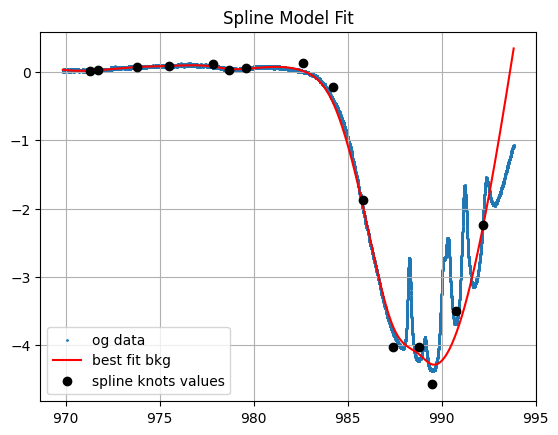

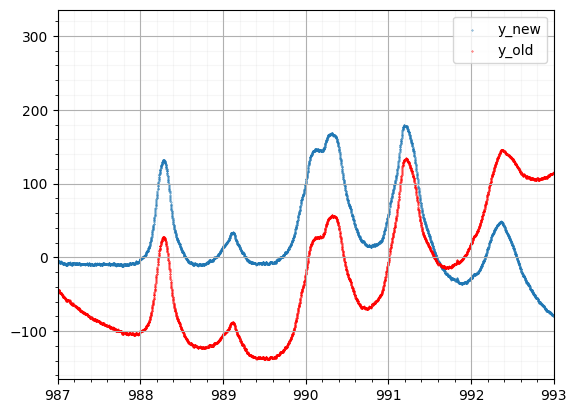

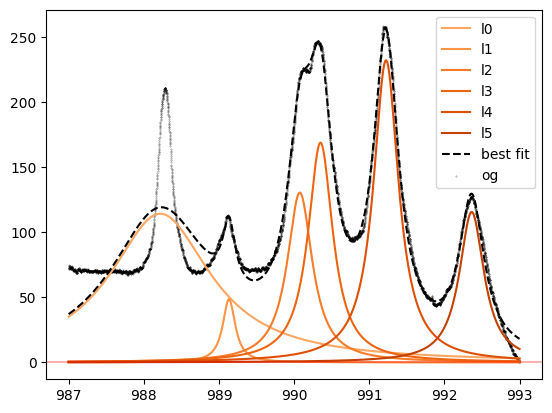

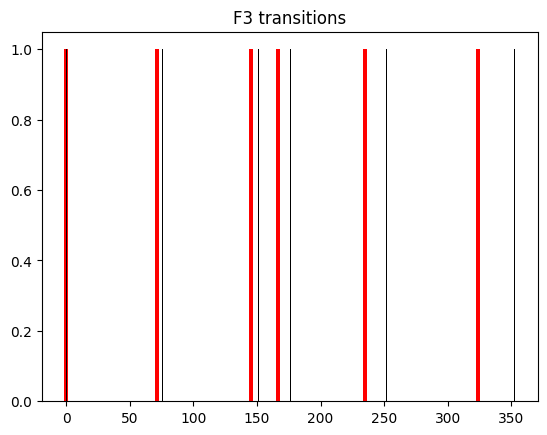

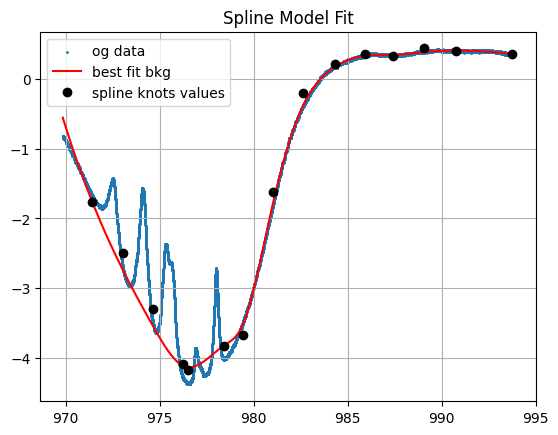

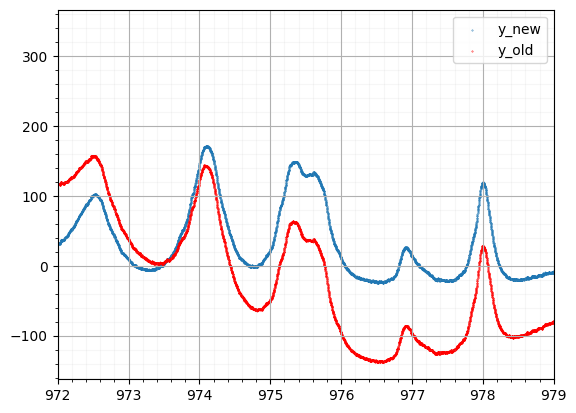

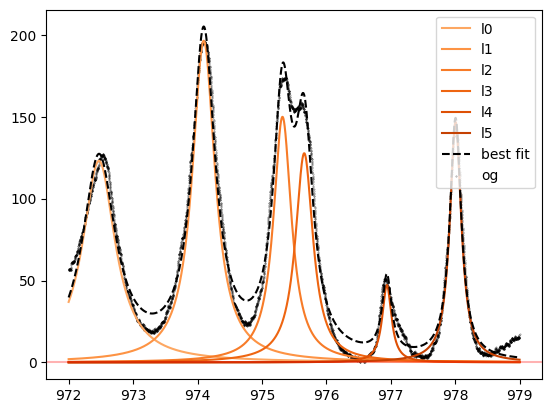

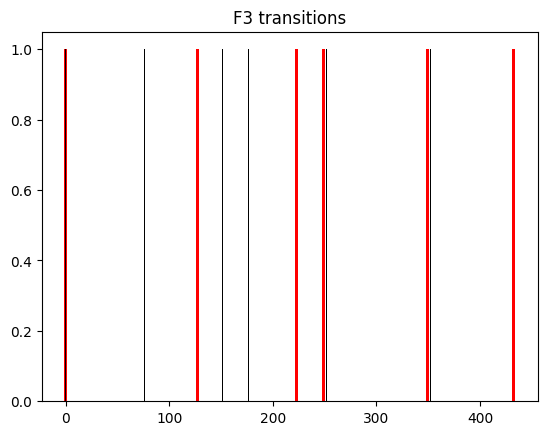

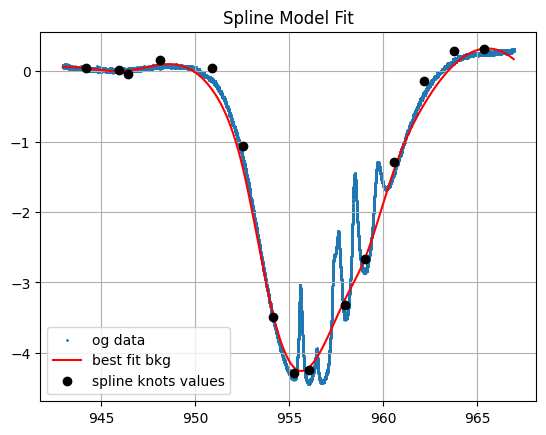

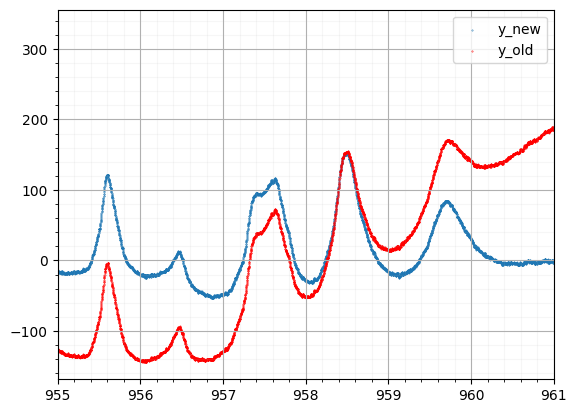

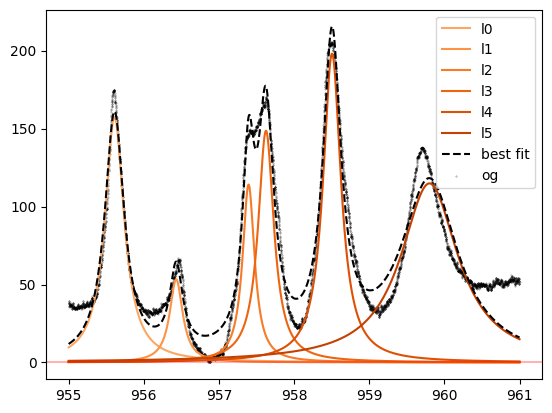

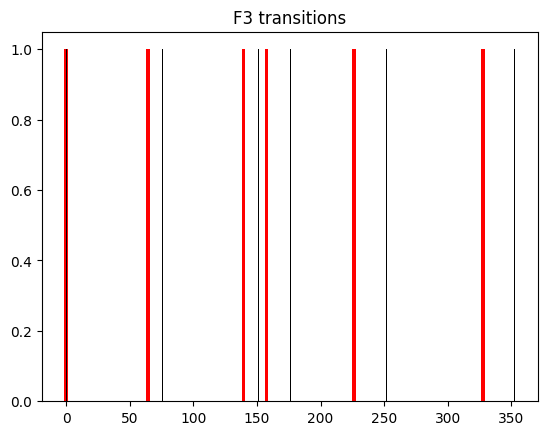

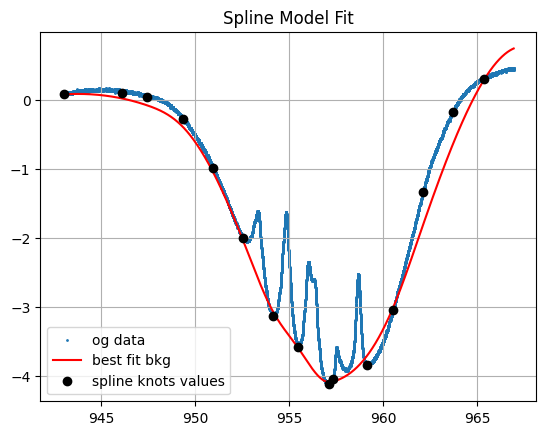

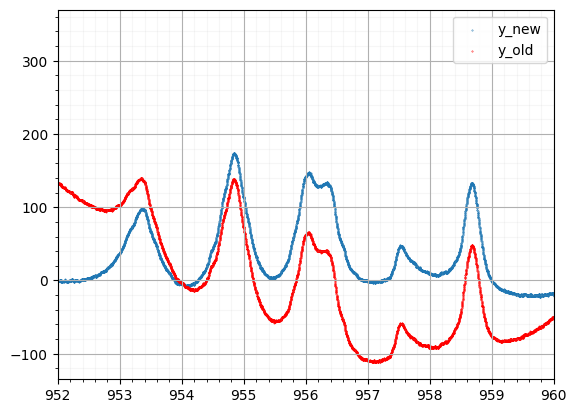

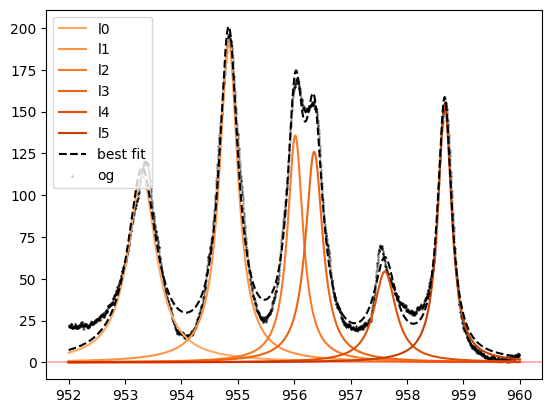

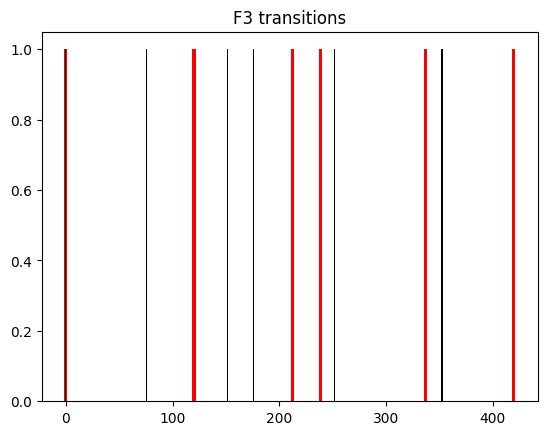

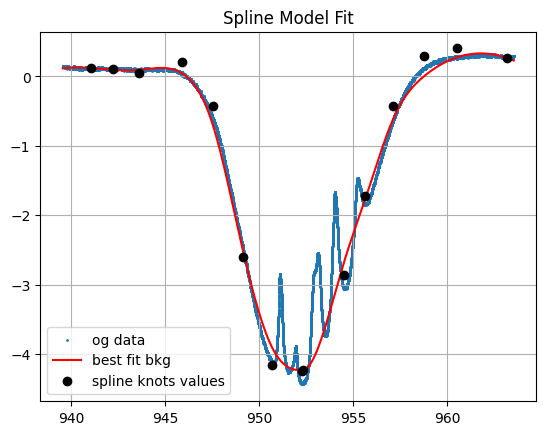

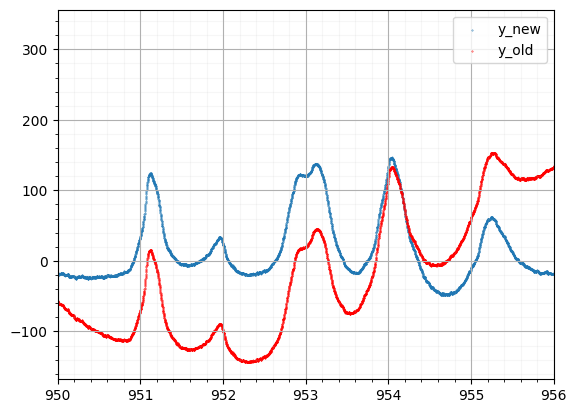

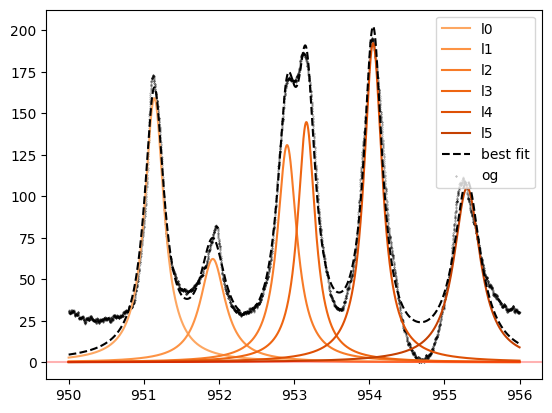

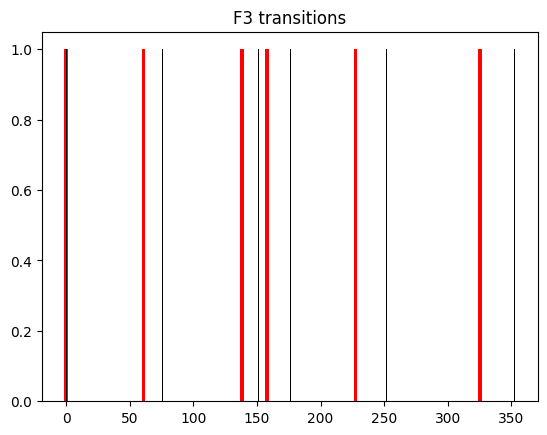

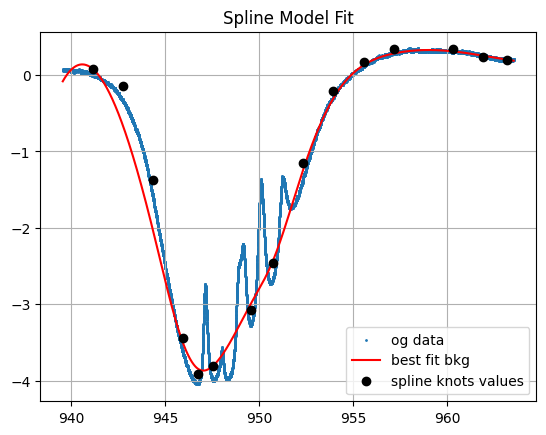

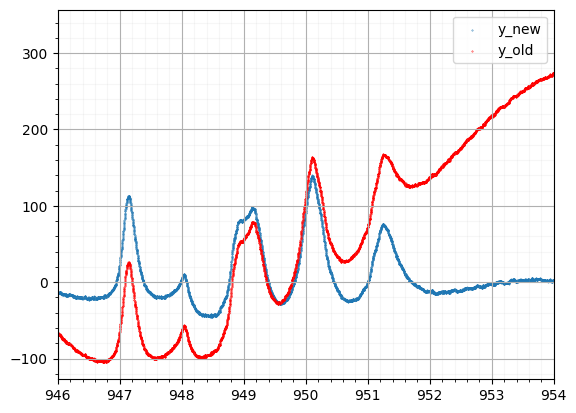

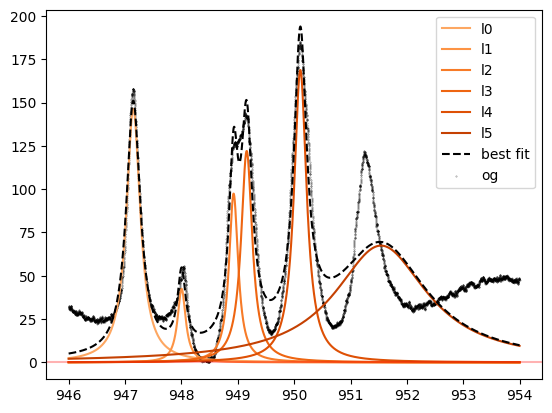

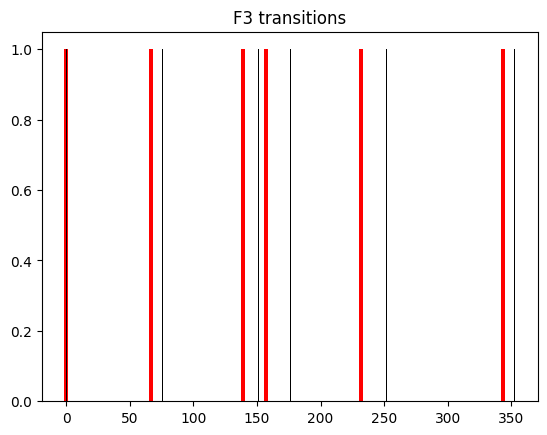

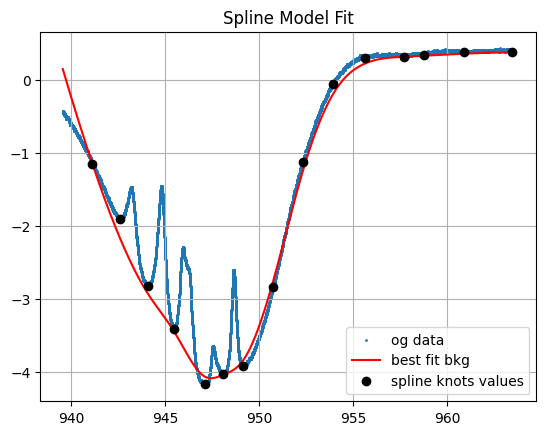

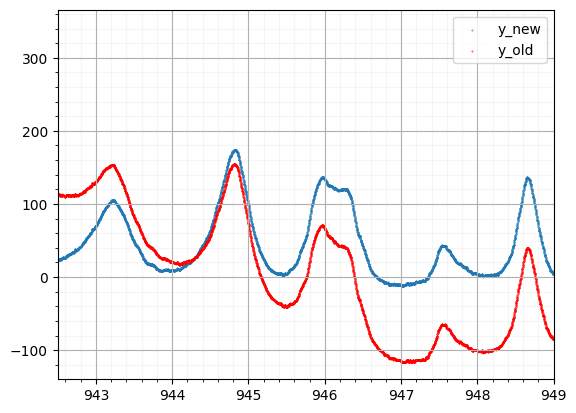

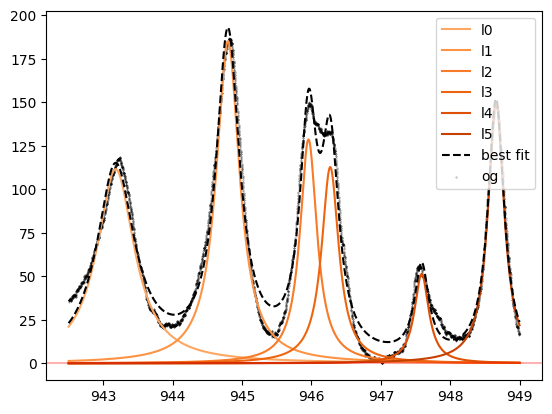

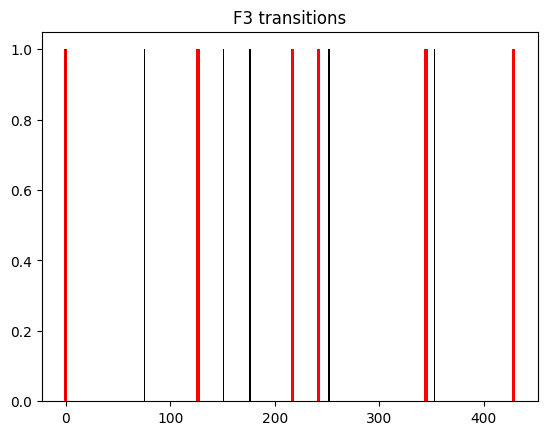

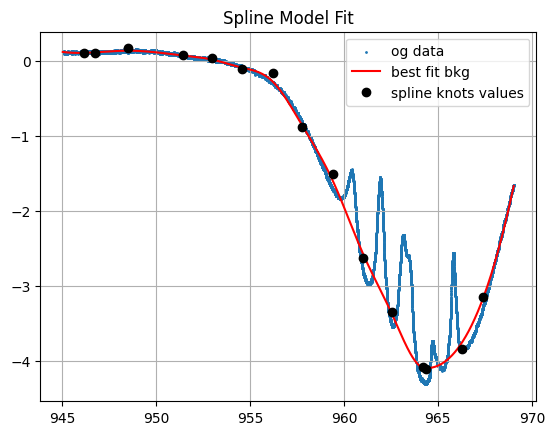

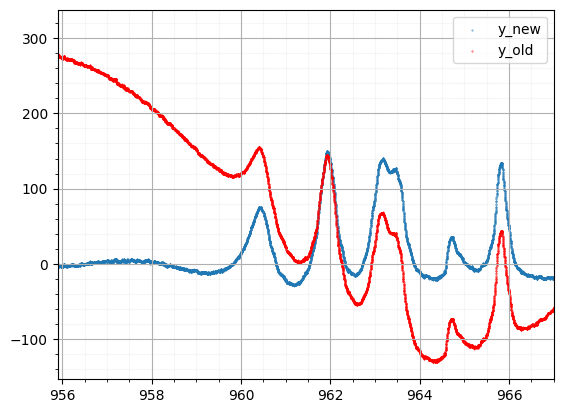

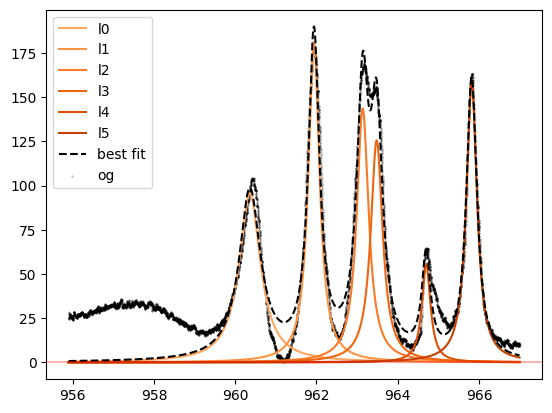

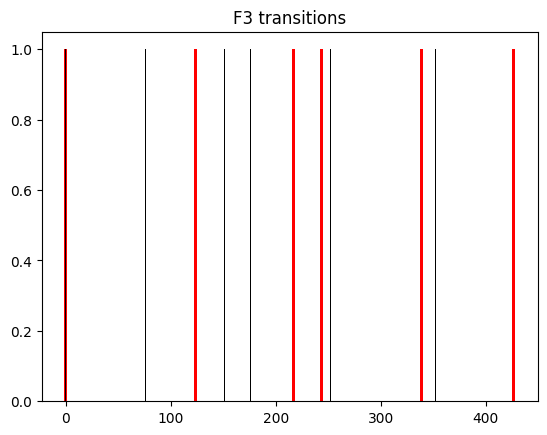

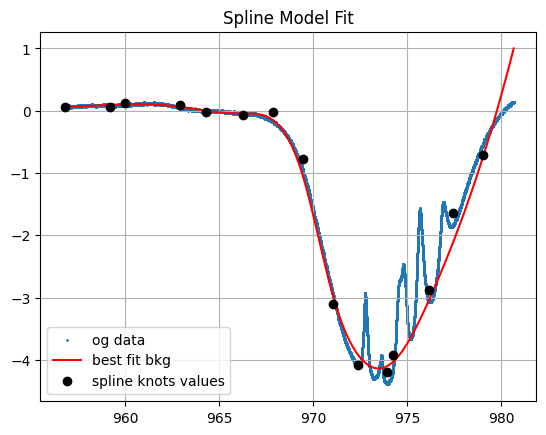

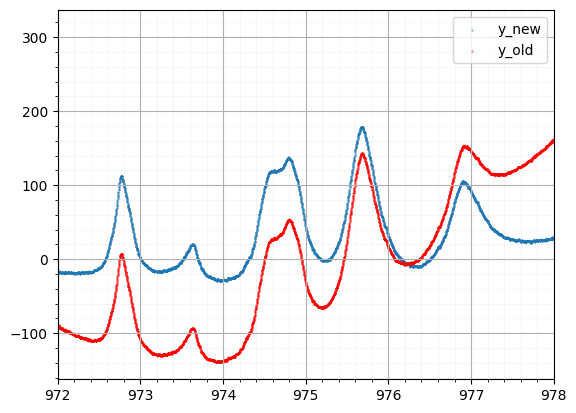

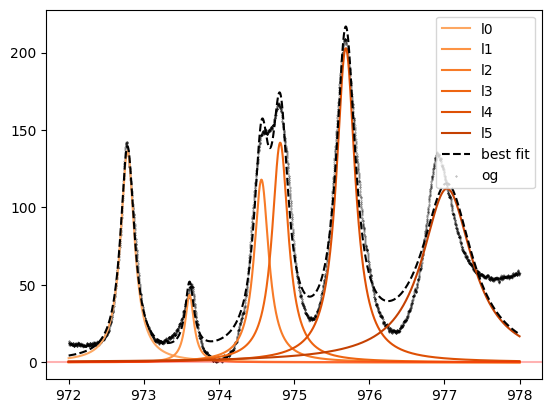

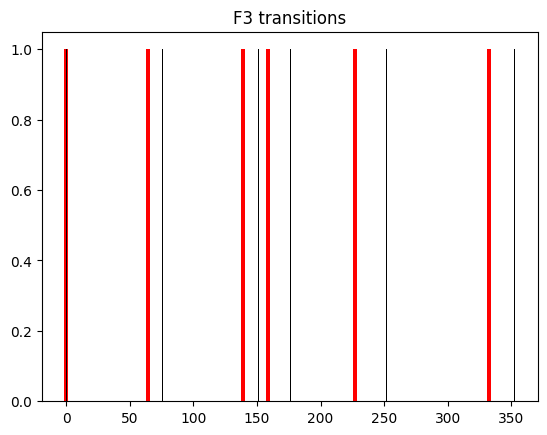

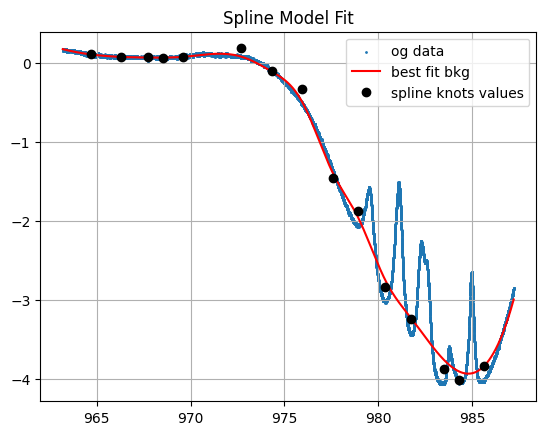

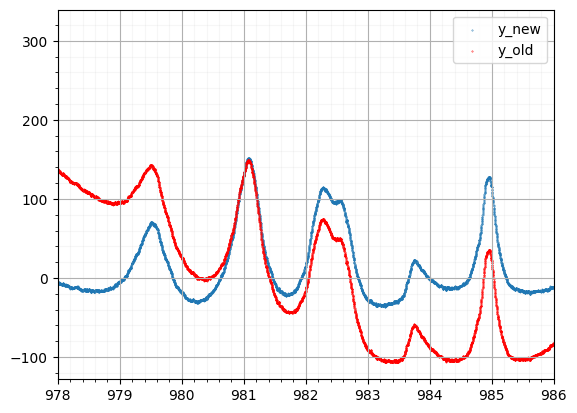

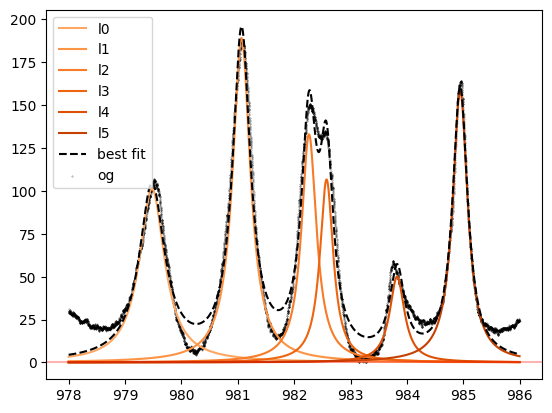

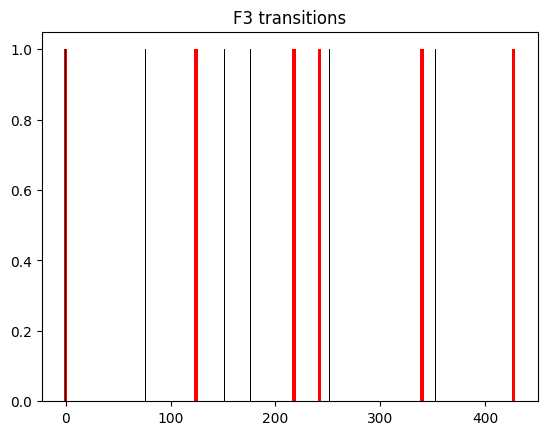

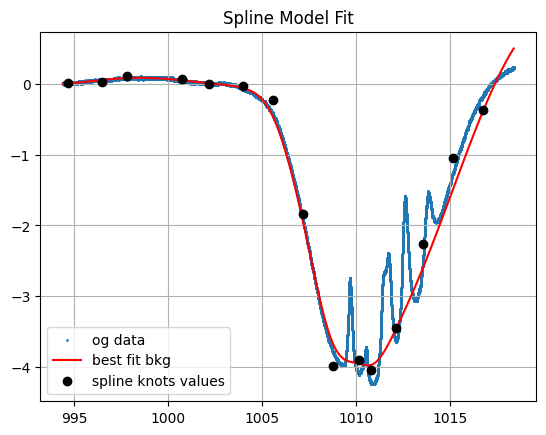

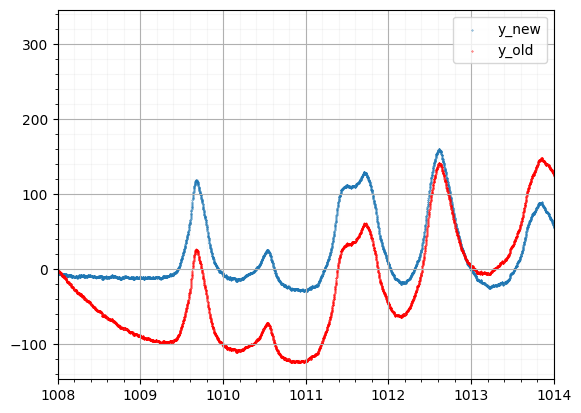

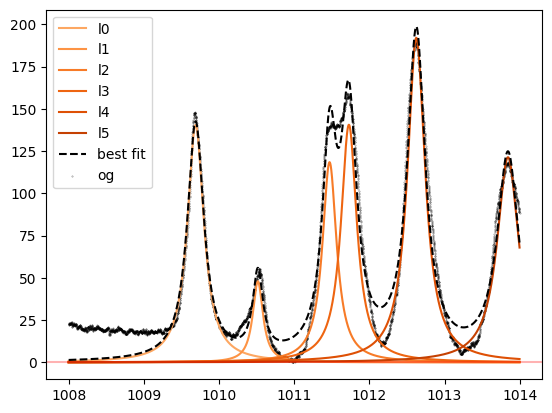

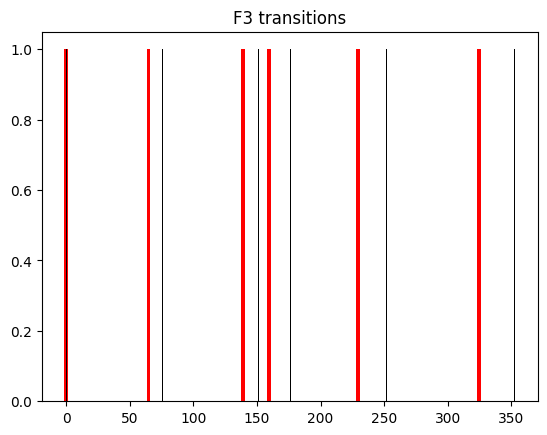

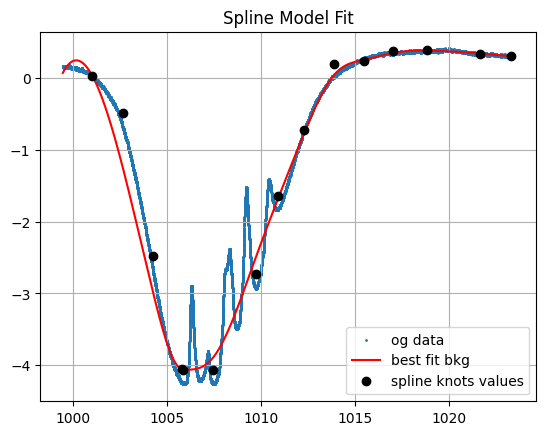

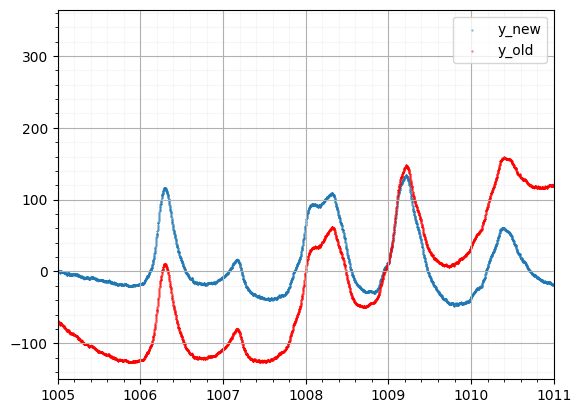

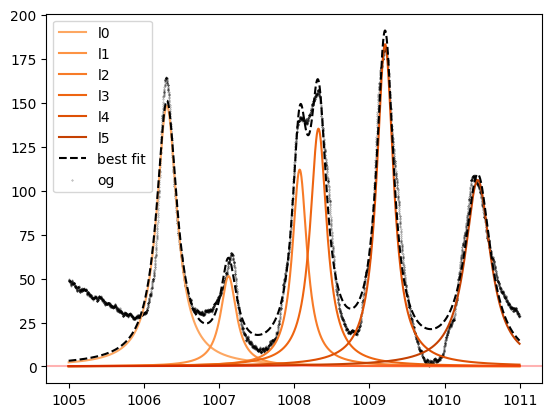

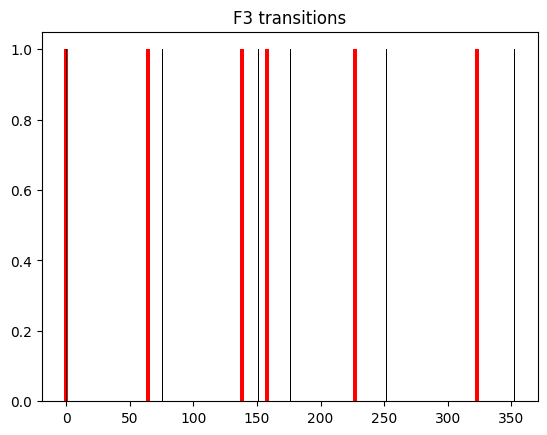

In [565]:
# evaluating!
for i,dataset in enumerate(peak6_datasets):
    # print(i)
    peaks[i], fwhms[i] = sp.general(i, peak6_datasets)
    # print(peaks[i], fwhms[i])

In [562]:
#export guesses 

# cuts = pd.DataFrame(cuts)
# centers = pd.DataFrame(centers)
# cuts.to_csv('cuts.csv')
# centers.to_csv('centers.csv')

In [573]:
peaks = np.stack(peaks).reshape(12, 6, 2)
fwhms = np.stack(fwhms).reshape(12,6,2)

### GET AVEGAAS

In [600]:
peaks_ave = (np.average(peaks, axis=0))
peaks_ave_std = np.std(peaks, axis=0)
print(peaks_ave_std)
print(peaks_ave)

[[0.         0.00182418]
 [0.37378072 0.00155049]
 [0.49120019 0.00156644]
 [0.5301883  0.00111736]
 [0.71390517 0.00084481]
 [0.62486884 0.00325047]]
[[0.00000000e+00 2.17175153e-03]
 [1.14943440e+00 2.50486220e-03]
 [2.20224326e+00 2.54359687e-03]
 [2.48517413e+00 2.41935464e-03]
 [3.53267456e+00 1.72833121e-03]
 [4.72888151e+00 2.70882537e-03]]


In [601]:
transitionsf3 = [0, 151.21, 352.45000000000005] + [ 75.605 ,251.83 , 176.225]
transitionsf4 = [0, 201.24, 452.24] + [100.62 ,326.74 ,226.12]

rate = 78139901249.54921e-9
rate *= 0.9

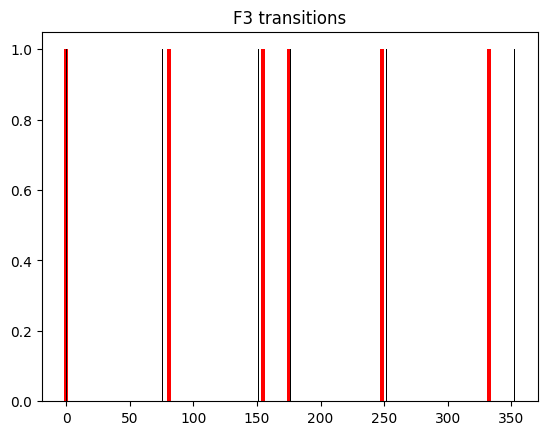

In [603]:
plt.bar(peaks_ave[:,0]*rate, height=np.ones(6), width=3, color = 'red')
plt.bar(transitionsf3, height=np.ones(6), width=1, color = 'black', linestyle ='-')
plt.title('F3 transitions')
plt.show()